In [3]:
import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error

# Load dataset
dataset = pd.read_csv("Housing.csv")

# Features and target
X = dataset.drop("price", axis=1)
y = dataset["price"].values

# Categorical columns
categorical_cols = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea',
    'furnishingstatus'
]

# ColumnTransformer (ONLY encoding)
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Transform X
X = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# XGBoost model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:",root_mean_squared_error(y_test,y_pred))
# Compare predictions
print(
    np.concatenate(
        (y_test.reshape(-1, 1), y_pred.reshape(-1, 1)),
        axis=1
    )
)


R2 Score: 0.5742645859718323
RMSE: 1107594.0
[[ 4585000.    4183116.25]
 [ 6083000.    5541446.5 ]
 [ 4007500.    4524490.  ]
 [ 6930000.    6194637.  ]
 [ 2940000.    3248839.25]
 [ 6195000.    6397826.5 ]
 [ 3535000.    3731389.5 ]
 [ 2940000.    3687144.75]
 [ 3500000.    3574456.75]
 [ 7980000.    7158925.5 ]
 [ 6755000.    6131989.5 ]
 [ 3990000.    3580863.  ]
 [ 3150000.    4302015.  ]
 [ 3290000.    4908091.5 ]
 [ 4130000.    4096569.75]
 [ 2660000.    1835564.75]
 [ 4410000.    4098841.  ]
 [ 3710000.    4145384.  ]
 [ 3360000.    3600127.75]
 [ 4270000.    3998680.  ]
 [ 5005000.    5768910.  ]
 [ 5383000.    6121671.  ]
 [ 6440000.    4590770.  ]
 [ 1890000.    2311203.75]
 [ 6125000.    6457417.  ]
 [ 5460000.    5807369.5 ]
 [ 5803000.    5767528.  ]
 [ 4620000.    5628113.  ]
 [ 5530000.    4829183.  ]
 [ 5950000.    6275484.  ]
 [ 4305000.    3687929.25]
 [ 3640000.    5112342.5 ]
 [ 5250000.    8147627.  ]
 [ 3325000.    3442293.5 ]
 [ 3703000.    4752533.  ]
 [ 4753000

ValueError: x and y must be the same size

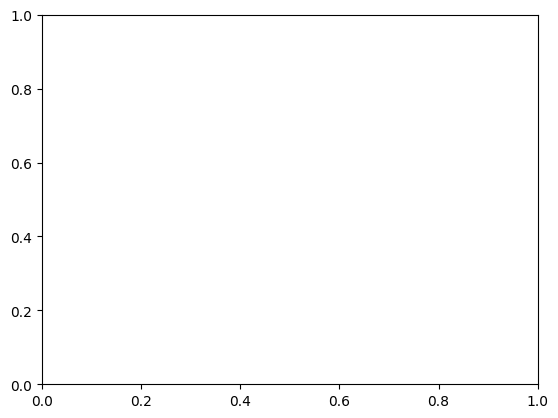

In [4]:
import matplotlib.pyplot as plt

for i in X:
    plt.scatter(i,y)
    plt.title(f"{i}vs {y}")
    plt.xlabel(f"{i}")
    plt.ylabel(f"{y}")
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset = pd.read_csv("Housing.csv")

# Features and target
X = dataset.drop("price", axis=1)
y = dataset["price"].values

# Categorical columns
categorical_cols = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea',
    'furnishingstatus'
]

# ColumnTransformer (only encoding, no scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Transform features
X = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# XGBoost model
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=0
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
# some sklearn versions don't support `squared=False`, so compute RMSE explicitly
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

# Compare actual vs predicted
print(
    np.concatenate(
        (y_test.reshape(-1, 1), y_pred.reshape(-1, 1)),
        axis=1
    )
)


RMSE: 1124653.1909882263
R2 Score: 0.561049222946167
[[ 4585000.     4231717.   ]
 [ 6083000.     5590155.5  ]
 [ 4007500.     4573463.5  ]
 [ 6930000.     6220957.5  ]
 [ 2940000.     3319968.75 ]
 [ 6195000.     6362997.   ]
 [ 3535000.     3879772.   ]
 [ 2940000.     3648561.75 ]
 [ 3500000.     3643409.75 ]
 [ 7980000.     7069870.5  ]
 [ 6755000.     6018700.5  ]
 [ 3990000.     3442854.   ]
 [ 3150000.     4391791.5  ]
 [ 3290000.     4827271.5  ]
 [ 4130000.     4011368.5  ]
 [ 2660000.     1807322.875]
 [ 4410000.     4033633.75 ]
 [ 3710000.     4048884.5  ]
 [ 3360000.     3555398.5  ]
 [ 4270000.     3993824.75 ]
 [ 5005000.     5826235.   ]
 [ 5383000.     6224571.   ]
 [ 6440000.     4690935.   ]
 [ 1890000.     2272128.   ]
 [ 6125000.     6534405.5  ]
 [ 5460000.     5802286.5  ]
 [ 5803000.     5803471.5  ]
 [ 4620000.     5637958.5  ]
 [ 5530000.     4835190.   ]
 [ 5950000.     6344383.5  ]
 [ 4305000.     3612996.   ]
 [ 3640000.     5194230.5  ]
 [ 5250000.     813